In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
data = pd.read_csv('RAW_AF7 RAW_AF8 pestaneos 5 segundos.csv')
datatest = pd.read_csv('RAW_AF7 RAW_AF8 pestaneos test.csv')


#Separa X e Y del dataset
X = data.iloc[:, 1:3].values
Y = np.zeros(len(data))

X_test = datatest.iloc[:,0:2].values
Y_test = np.zeros(len(datatest))


In [3]:
# METODO 1 DE ASIGNACION DE Y=1 A PARTIR DE ANALISIS VISUAL

for i in range(len(data)):
    if ((i>=1550 and  i<=1800) or (i>=2950 and i<=3050) or (i>=4230 and i<=4360)or (i>=5600 and i<=5730)
    or (i>=6940 and i<=7100)or (i>=8300 and i<=8460)or (i>=9700 and i<=9850)or (i>=11000 and i<=11100)
    or (i>=12480 and i<=12680)or (i>=13700 and i<=13800)or (i>=15020 and i<=15140)or (i>=16400 and i<=16600)):
        Y[i]=1

        
for i in range(len(datatest)):
    if ((i>=240 and  i<=300) or (i>=770 and i<=860) or (i>=1280 and i<=1400)or (i>=2230 and i<=2350)
    or (i>=2400 and i<=2550)or (i>=2600 and i<=2750)or (i>=3400 and i<=3500)):
        Y_test[i]=1
        


In [4]:
print('X: ',X)
print('Y: ',Y)
print('X_test: ',X_test)
print('Y_test: ',Y_test)

X:  [[810.9753  847.16486]
 [817.55524 852.0998 ]
 [809.3303  848.8099 ]
 ...
 [834.005   853.7448 ]
 [824.13513 845.5199 ]
 [819.2002  837.295  ]]
Y:  [0. 0. 0. ... 0. 0. 0.]
X_test:  [[810.9753  852.0998 ]
 [822.4902  858.67975]
 [824.13513 858.67975]
 ...
 [820.8452  858.67975]
 [820.8452  858.67975]
 [820.8452  858.67975]]
Y_test:  [0. 0. 0. ... 0. 0. 0.]


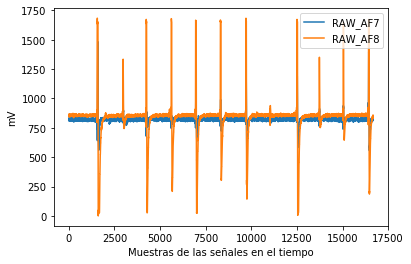

In [5]:
plt.figure()
[af7,af8] = plt.plot(X)
plt.legend([af7,af8], ["RAW_AF7","RAW_AF8"], loc=1)
plt.xlabel("Muestras de las señales en el tiempo")
plt.ylabel("mV")
plt.show()


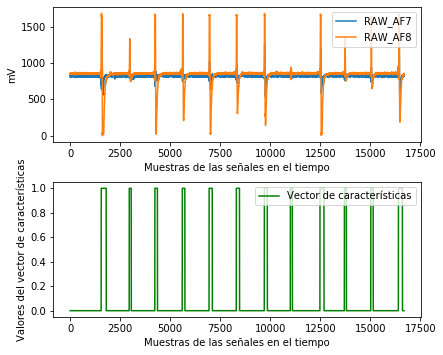

In [6]:
plt.figure()

plt.subplot(211)
[af7,af8] = plt.plot(X)
plt.legend([af7,af8], ["RAW_AF7","RAW_AF8"], loc=1)
plt.xlabel("Muestras de las señales en el tiempo")
plt.ylabel("mV")

plt.subplot(212)
[y]=plt.plot(Y, 'g')
plt.legend([y], ["Vector de características"], loc=1)
plt.xlabel("Muestras de las señales en el tiempo")
plt.ylabel("Valores del vector de características")

plt.subplots_adjust(top=1.2, left=0.10, right=0.95, hspace=0.3,wspace=0.35)
plt.show()

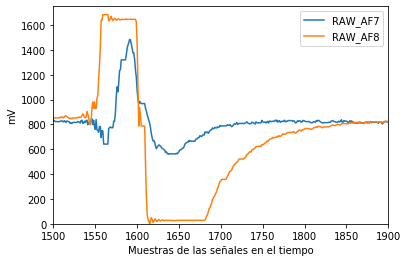

In [7]:
plt.figure()
[af7,af8] = plt.plot(X)
plt.legend([af7,af8], ["RAW_AF7","RAW_AF8"], loc=1)
plt.xlabel("Muestras de las señales en el tiempo")
plt.ylabel("mV")
plt.axis([1500,1900,0,1750])
plt.show()


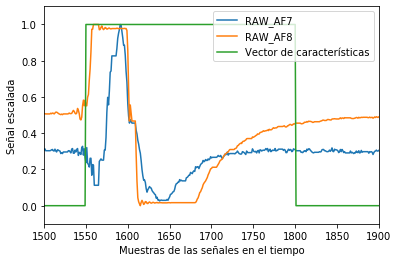

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
x=(scaler.transform(X))

plt.figure()
[af7,af8] = plt.plot(x)
[y]=plt.plot(Y)
plt.legend([af7,af8,y], ["RAW_AF7","RAW_AF8","Vector de características"], loc=1)
plt.xlabel("Muestras de las señales en el tiempo")
plt.ylabel("Señal escalada")
plt.axis([1500,1900,-0.1,1.1])
plt.show()

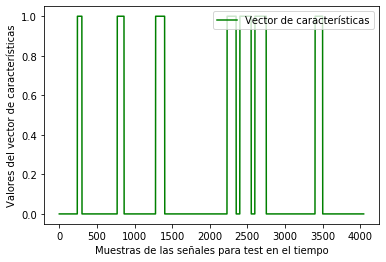

In [9]:
plt.figure()
[y]=plt.plot(Y_test, 'g')
plt.legend([y], ["Vector de características"], loc=1)
plt.xlabel("Muestras de las señales para test en el tiempo")
plt.ylabel("Valores del vector de características")
plt.show()

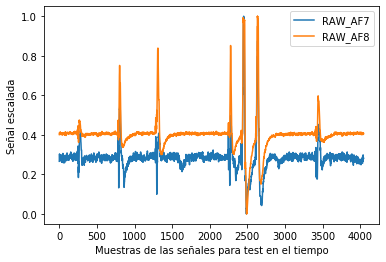

In [10]:
scaler = MinMaxScaler()
scaler.fit(X_test)
x_test=(scaler.transform(X_test))

plt.figure()
[af7,af8] = plt.plot(x_test)
plt.legend([af7,af8], ["RAW_AF7","RAW_AF8"], loc=1)
plt.xlabel("Muestras de las señales para test en el tiempo")
plt.ylabel("Señal escalada")
plt.show()



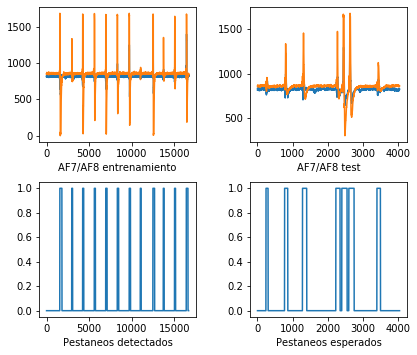

In [11]:
plt.figure()

plt.subplot(221)
plt.plot(X)
plt.xlabel('AF7/AF8 entrenamiento')

plt.subplot(222)
plt.plot(X_test)
plt.xlabel('AF7/AF8 test')

plt.subplot(223)
plt.plot(Y)
plt.xlabel('Pestaneos detectados')

plt.subplot(224)
plt.plot(Y_test)
plt.xlabel('Pestaneos esperados')

plt.subplots_adjust(top=1.2, left=0.10, right=0.95, hspace=0.3,wspace=0.35)
plt.show()

In [12]:
from sklearn.svm import SVC
clf = SVC(gamma=.01, C=1000)
clf.fit(X,Y)

predicted = clf.predict(X_test)
from sklearn import metrics

print("Accuracy = {}\nPrecision = {}\nRecall = {}\nF1 Score = {}".format(metrics.accuracy_score(Y_test, predicted), metrics.precision_score(Y_test, predicted),metrics.recall_score(Y_test, predicted, average='weighted', labels=np.unique(predicted)),metrics.f1_score(Y_test, predicted)))

Accuracy = 0.9056090931554238
Precision = 0.8217054263565892
Recall = 0.9056090931554238
F1 Score = 0.7350901525658808


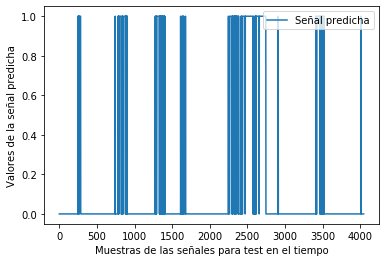

In [13]:
plt.figure()
[pred] = plt.plot(predicted)

plt.legend([pred], ["Señal predicha"], loc=1)
plt.xlabel("Muestras de las señales para test en el tiempo")
plt.ylabel("Valores de la señal predicha")
plt.show()

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


scaler.fit(X)
X_lr = scaler.transform(X)


scaler.fit(X_test)
X_test_lr = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression
clf_D = LogisticRegression(solver='lbfgs', random_state=1)

clf_D.fit(X_lr, Y)


predict_LR = clf_D.predict(X_test_lr)

print("Accuracy = {}\nPrecision = {}\nRecall = {}\nF1 Score = {}".format(metrics.accuracy_score(Y_test, predict_LR), metrics.precision_score(Y_test, predict_LR),metrics.recall_score(Y_test, predict_LR, average='weighted', labels=np.unique(predict_LR)),metrics.f1_score(Y_test, predict_LR)))




Accuracy = 0.8052878675562145
Precision = 1.0
Recall = 0.8052878675562145
F1 Score = 0.022332506203473945


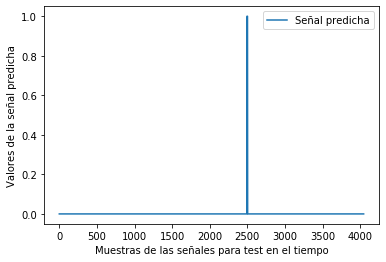

In [15]:
plt.figure()
[pred_LR] = plt.plot(predict_LR)

plt.legend([pred_LR], ["Señal predicha"], loc=1)
plt.xlabel("Muestras de las señales para test en el tiempo")
plt.ylabel("Valores de la señal predicha")
plt.show()

In [16]:
data = pd.read_csv('RAW_AF7 RAW_AF8 pestaneos 5 segundos.csv')
datatest = pd.read_csv('RAW_AF7 RAW_AF8 pestaneos test.csv')


#Separa X e Y del dataset
X = data.iloc[:, 1:5].values
Y = np.zeros(len(data))

X_test = datatest.values
Y_test = np.zeros(len(datatest))


In [17]:
# METODO 2 DE ASIGNACION DE Y=1 A PARTIR DE ANALISIS ESTADISTICO
for i in range (1,len(X)):
    if np.mean(X)*1.15<np.mean(X[i]):
        Y[i]=1
    if np.mean(X)*0.85>np.mean(X[i]):
        Y[i]=1
        
for i in range (1,len(X_test)):
    if np.mean(X_test)*1.15<np.mean(X_test[i]):
        Y_test[i]=1
    if np.mean(X_test)*0.85>np.mean(X_test[i]):
        Y_test[i]=1



In [18]:
clf = SVC(gamma=.01, C=1000)
clf.fit(X,Y)

predicted = clf.predict(X_test)

print("Accuracy = {}\nPrecision = {}\nRecall = {}\nF1 Score = {}".format(metrics.accuracy_score(Y_test, predicted), metrics.precision_score(Y_test, predicted),metrics.recall_score(Y_test, predicted, average='weighted', labels=np.unique(predicted)),metrics.f1_score(Y_test, predicted)))


Accuracy = 0.9827032369656535
Precision = 0.8017492711370262
Recall = 0.9827032369656535
F1 Score = 0.8870967741935484


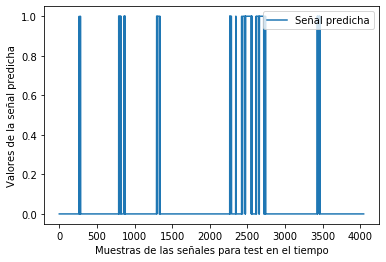

In [19]:
plt.figure()
[pred] = plt.plot(predicted)

plt.legend([pred], ["Señal predicha"], loc=1)
plt.xlabel("Muestras de las señales para test en el tiempo")
plt.ylabel("Valores de la señal predicha")
plt.show()

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


scaler.fit(X)
X_lr = scaler.transform(X)


scaler.fit(X_test)
X_test_lr = scaler.transform(X_test)

from sklearn.linear_model import LogisticRegression
clf_D = LogisticRegression(solver='lbfgs', random_state=1)

clf_D.fit(X_test_lr, Y_test)


predict_LR = clf_D.predict(X_test_lr)

print("Accuracy = {}\nPrecision = {}\nRecall = {}\nF1 Score = {}".format(metrics.accuracy_score(Y_test, predict_LR), metrics.precision_score(Y_test, predict_LR),metrics.recall_score(Y_test, predict_LR, average='weighted', labels=np.unique(predict_LR)),metrics.f1_score(Y_test, predict_LR)))



Accuracy = 0.9367432666172474
Precision = 1.0
Recall = 0.9367432666172474
F1 Score = 0.14093959731543623


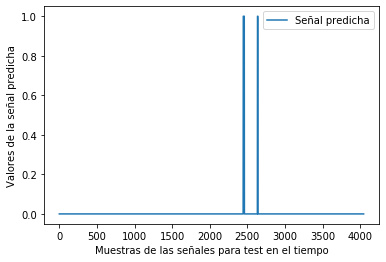

In [21]:
plt.figure()
[pred_LR] = plt.plot(predict_LR)

plt.legend([pred_LR], ["Señal predicha"], loc=1)
plt.xlabel("Muestras de las señales para test en el tiempo")
plt.ylabel("Valores de la señal predicha")
plt.show()